## Business Case


This model helps to classify traffic signs correctly using Le-Ne t Network. This is an imporatant aspect of self driving cars.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("/Users/Work/Desktop/Project_DS/Traffic_Sign_Classification/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/Users/Work/Desktop/Project_DS/Traffic_Sign_Classification/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/Users/Work/Desktop/Project_DS/Traffic_Sign_Classification/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels'] # features for x and labels for y
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



In [4]:
X_train.shape # 34799, 32, 32, 3 -> 34799 number of images with the dimension of 32  by 32 with RGB 3 colors

(34799, 32, 32, 3)

In [5]:
y_train.shape 

(34799,)

In [6]:
X_validation.shape


(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

## Image Exploration 

36

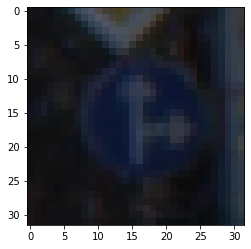

In [10]:
i = 1000 #setting index i to 1000
plt.imshow(X_train[i]) #to see the actual image of index of i
y_train[i]# to see the actual label or the class of image at the index of i

23

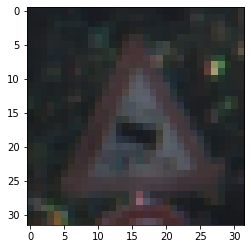

In [11]:
i = 2000 
plt.imshow(X_train[i]) 
y_train[i]

1

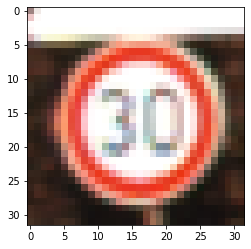

In [12]:
i = 3000 
plt.imshow(X_train[i]) 
y_train[i]

37

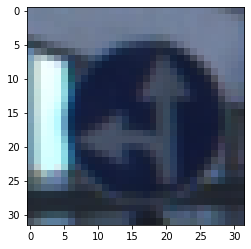

In [13]:
i = 5000 
plt.imshow(X_train[i]) 
y_train[i]

38

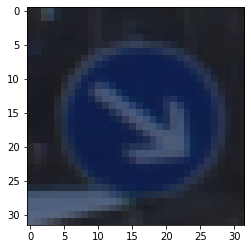

In [14]:
i = 2000 
plt.imshow(X_validation[i]) 
y_validation[i]

11

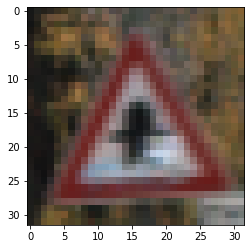

In [15]:
i = 3000 
plt.imshow(X_test[i]) 
y_test[i]

## Data Preparation

In [16]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)# to shuffle the data

In [17]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)#to change the image from this set from color to gray scale
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)#to change the image from this set from color to gray scale
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)#to change the image from this set from color to gray scale

In [18]:
X_train_gray.shape

(34799, 32, 32, 1)

In [19]:
X_test_gray.shape

(12630, 32, 32, 1)

In [20]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [21]:
X_train_gray_norm = (X_train_gray - 128)/128 #to normalise the images into -1 to 1 scale
X_test_gray_norm = (X_test_gray - 128)/128 #to normalise the images into -1 to 1 scale
X_validation_gray_norm = (X_validation_gray - 128)/128#to normalise the images into -1 to 1 scale

<Figure size 432x288 with 0 Axes>

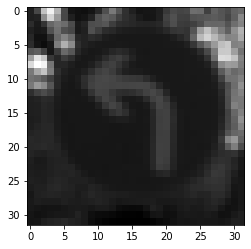

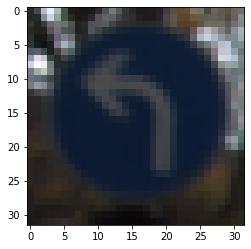

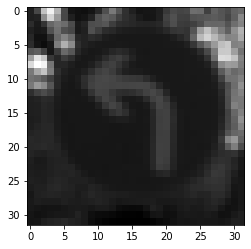

<Figure size 432x288 with 0 Axes>

In [22]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray') #squeeze image to remove the data (1) in color scale in (34799, 32, 32, 1)
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

<Figure size 432x288 with 0 Axes>

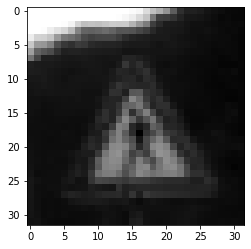

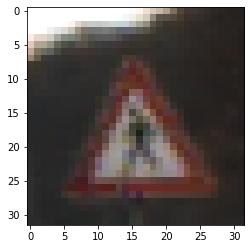

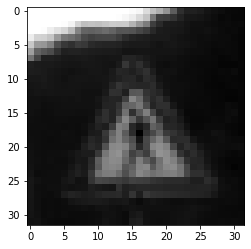

<Figure size 432x288 with 0 Axes>

In [23]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray') #squeeze image to remove the data (1) in color scale in (34799, 32, 32, 1)
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

<Figure size 432x288 with 0 Axes>

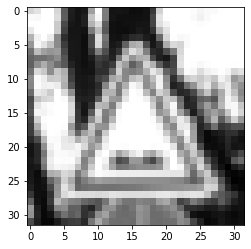

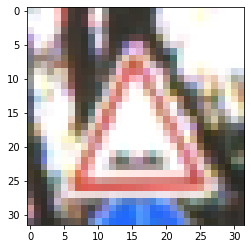

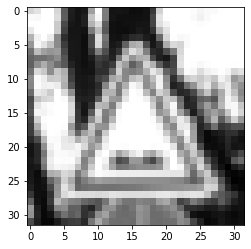

<Figure size 432x288 with 0 Axes>

In [24]:
i = 610
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray') #squeeze image to remove the data (1) in color scale in (34799, 32, 32, 1)
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split 

Using TensorFlow backend.


In [26]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation ='relu',input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation ='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units =120,activation ='relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [27]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics =['accuracy'])

In [28]:
cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size =500,
             nb_epoch = 5,
             verbose = 1,
             validation_data =(X_validation_gray_norm, y_validation))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/5
23500/34799 [===================>..........] - ETA: 2s - loss: 3.4283 - accuracy: 0.1117

KeyboardInterrupt: 

In [29]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size =500,
             nb_epoch = 50,
             verbose = 1,
             validation_data =(X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
 1000/34799 [..............................] - ETA: 6s - loss: 3.1029 - accuracy: 0.2080

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


34799/34799 [==============================] - 7s 195us/step - loss: 2.2840 - accuracy: 0.3943 - val_loss: 1.8575 - val_accuracy: 0.5052
Epoch 2/50
34799/34799 [==============================] - 7s 195us/step - loss: 1.1870 - accuracy: 0.6582 - val_loss: 1.2547 - val_accuracy: 0.6406
Epoch 3/50
34799/34799 [==============================] - 6s 186us/step - loss: 0.7914 - accuracy: 0.7763 - val_loss: 0.9960 - val_accuracy: 0.7118
Epoch 4/50
34799/34799 [==============================] - 6s 185us/step - loss: 0.6006 - accuracy: 0.8353 - val_loss: 0.8014 - val_accuracy: 0.7692
Epoch 5/50
34799/34799 [==============================] - 6s 185us/step - loss: 0.4828 - accuracy: 0.8715 - val_loss: 0.7559 - val_accuracy: 0.7834
Epoch 6/50
34799/34799 [==============================] - 6s 184us/step - loss: 0.4076 - accuracy: 0.8919 - val_loss: 0.7241 - val_accuracy: 0.7900
Epoch 7/50
34799/34799 [==============================] - 6s 187us/step - loss: 0.3578 - accuracy: 0.9053 - val_loss: 0.669

## Model Evaluation

In [30]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 1s 66us/step
Test Accuracy: 0.8789390325546265


In [31]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

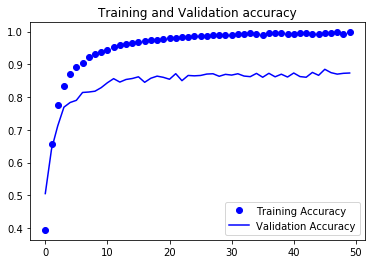

In [36]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label ='Training Accuracy')# bo blue dots
plt.plot(epochs,val_accuracy,'b',label ='Validation Accuracy')# b blue line
plt.title('Training and Validation accuracy')
plt.legend()

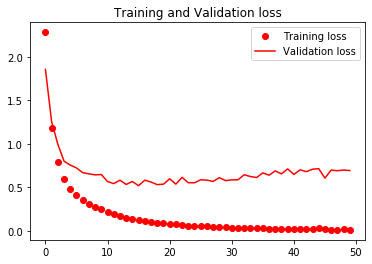

In [37]:

plt.plot(epochs,loss,'ro',label ='Training loss')# bo blue dots
plt.plot(epochs,val_loss,'r',label ='Validation loss')# b blue line
plt.title('Training and Validation loss')
plt.legend()

In [38]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

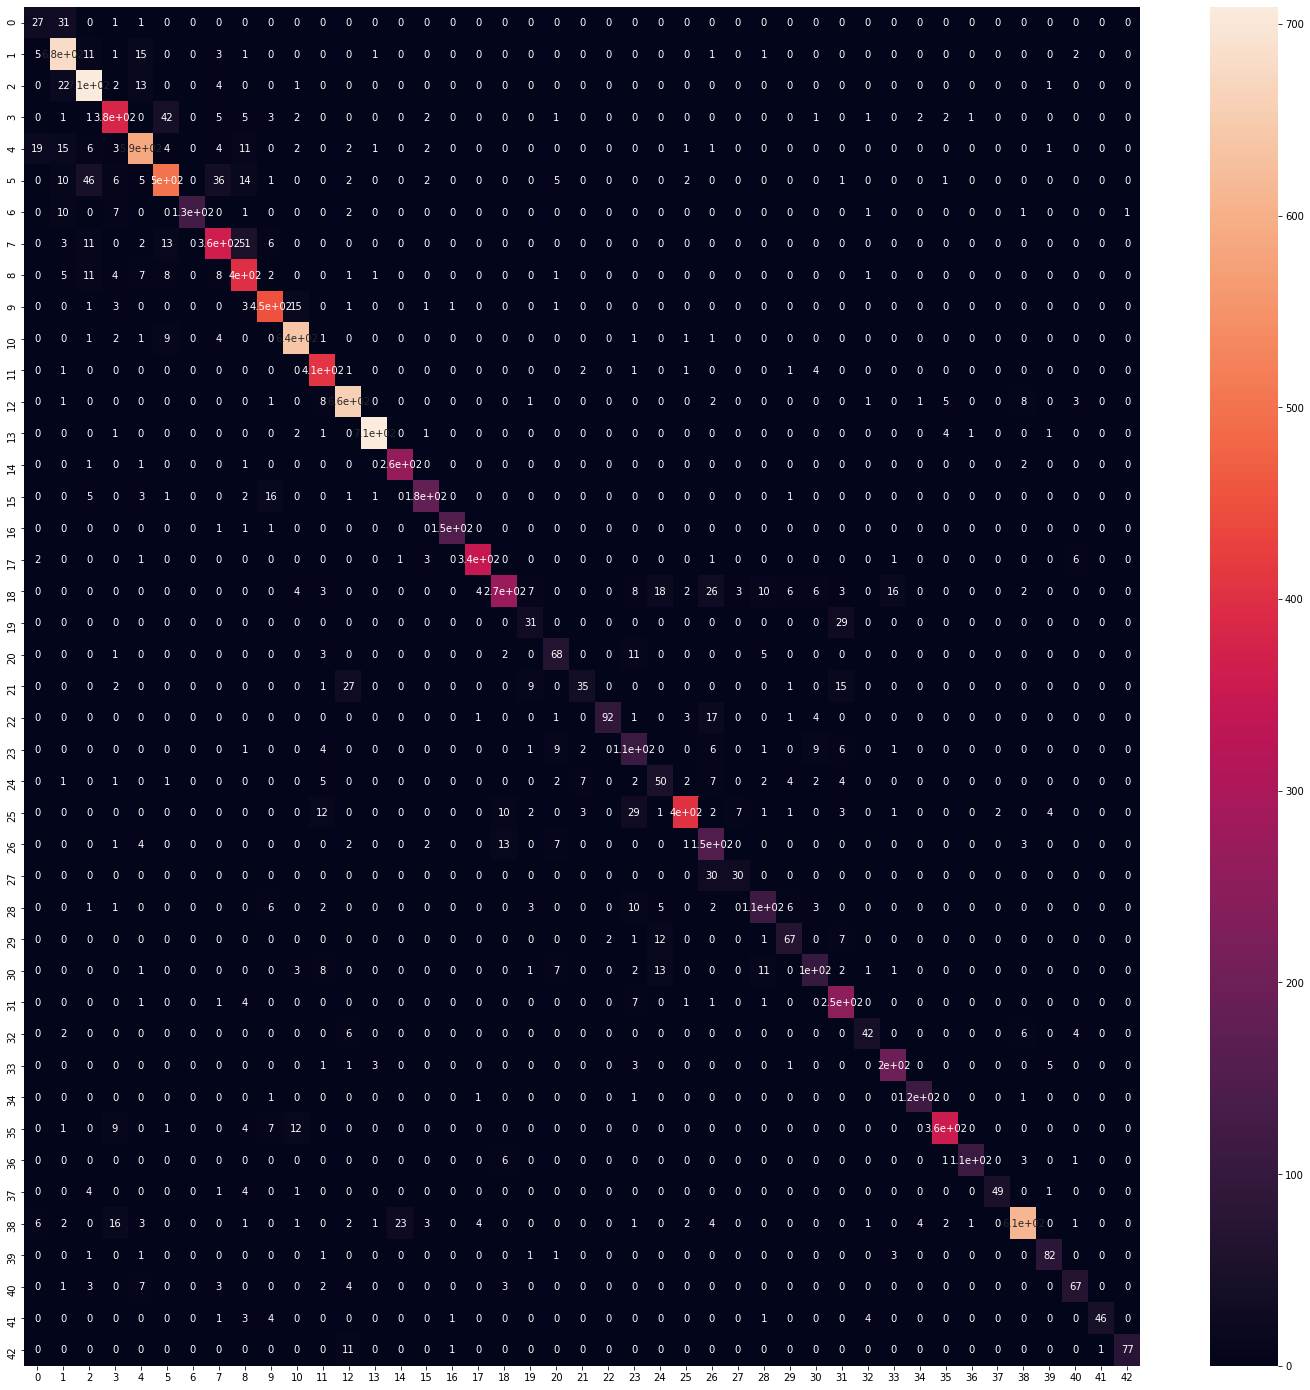

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)